# Continuous Control - Markus Bader's verison

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.


### My Turn!

In [1]:
from unityagents import UnityEnvironment
import numpy as np
env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64')

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

Found path: /home/max/projects/udacity/udacity_drl_p2_continuous-control/./Reacher_Linux/Reacher.x86_64
Mono path[0] = '/home/max/projects/udacity/udacity_drl_p2_continuous-control/./Reacher_Linux/Reacher_Data/Managed'
Mono config path = '/home/max/projects/udacity/udacity_drl_p2_continuous-control/./Reacher_Linux/Reacher_Data/MonoBleedingEdge/etc'
Preloaded 'ScreenSelector.so'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	ScreenSelector.so
	libgrpc_csharp_ext.x86.so
Logging to /home/max/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [2]:
from ddpg_agent import Agent



env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)

state_size = states.shape[1]
action_size = brain.vector_action_space_size
agent = Agent(state_size=state_size, action_size=action_size, random_seed=10)



Agent Device: cuda:0



Episode 100	Average Score: 0.99	Score: 0.96
Episode 200	Average Score: 1.17	Score: 0.78
Episode 300	Average Score: 1.08	Score: 2.12
Episode 400	Average Score: 1.06	Score: 1.00
Episode 500	Average Score: 1.11	Score: 0.92
Episode 600	Average Score: 1.05	Score: 0.90
Episode 700	Average Score: 1.32	Score: 2.28
Episode 800	Average Score: 0.99	Score: 1.88
Episode 900	Average Score: 1.06	Score: 1.10
Episode 1000	Average Score: 1.11	Score: 0.38
Episode 1100	Average Score: 1.18	Score: 1.78
Episode 1200	Average Score: 1.16	Score: 0.58
Episode 1300	Average Score: 1.28	Score: 1.18
Episode 1400	Average Score: 1.05	Score: 0.64
Episode 1500	Average Score: 1.16	Score: 2.08
Episode 1600	Average Score: 1.09	Score: 0.68
Episode 1700	Average Score: 1.15	Score: 0.88
Episode 1800	Average Score: 1.09	Score: 0.86
Episode 1900	Average Score: 1.16	Score: 1.68
Episode 2000	Average Score: 1.01	Score: 1.54


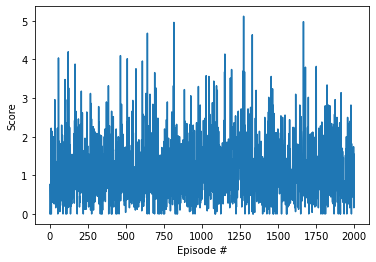

In [3]:
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import torch

            
def ddpg(n_episodes=2000, max_t=700):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            actions = np.clip(action, -1, 1) 
            #print(actions)
            env_info = env.step(actions)[brain_name] 
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]  
            score += env_info.rewards[0] 
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 100 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
            
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.plot(np.arange(1, len(scores)+1), scores)
plt.show()